In [55]:
import numpy as np
from pyproj import Proj, transform
import matplotlib.pyplot as plt

# Array radius
R = 75.0
# Number of division
ndiv = 7
# Middle sensor
flag_s0 = True
# outfile
outfile = 'CULC_Array150-plan1.txt'
# Array central location near CULC
#lat0, lon0 = -42.760618, 172.803985 # plan0
lat0, lon0 = -42.758493, 172.805354 # plan1

# Input and output projections
ProjLonLat = Proj(init='epsg:4326') #WGS84
ProjXY = Proj(init='epsg:2193') #NZTM2000
#ProjXY = Proj(init='epsg:2134') #UTM59S

lambdamin = 4.0*np.pi*R/ndiv
lambdamax = 3.0*2.0*R
print(lambdamin, lambdamax)

(134.63968515384826, 450.0)


In [56]:
x0, y0 = transform(ProjLonLat,ProjXY,lon0,lat0)

In [57]:
# Angles
list_theta = np.arange(ndiv)/float(ndiv)*360.0

if flag_s0:
    nsta = ndiv+1
else:
    nsta = ndiv

list_x = np.empty(nsta)
list_y = np.empty(nsta)

# Loop over the angles
for ind, theta in enumerate(list_theta):
    list_x[ind] = x0 + float(R)*np.cos(theta/180.0*np.pi)
    list_y[ind] = y0 + float(R)*np.sin(theta/180.0*np.pi)
if flag_s0:
    list_x[-1] = x0
    list_y[-1] = y0

In [58]:
list_lon, list_lat = transform(ProjXY, ProjLonLat, list_x, list_y)
fout = open(outfile, 'w')
fout.write('Latitude Longitude\n')
np.savetxt(fout, zip(list_lat, list_lon), fmt = '%.8f')
fout.close()

In [59]:
#print(zip(list_lat, list_lon))

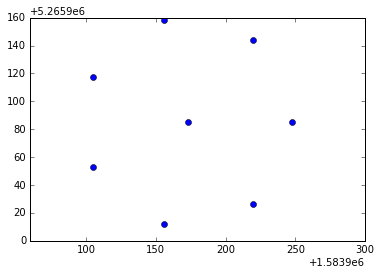

In [60]:
#plt.plot(x0, y0, 'ro')
plt.plot(list_x, list_y, 'o')
plt.axis('equal')
plt.show()